In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

fs = 16  # Fontsize

def printf(string, number, dec = 2, sci = True):
    if sci:
        print(string +  "{:.{dec}e}".format(number, dec = dec))
    else:
        print(string +  "{:.{dec}f}".format(number, dec = dec))


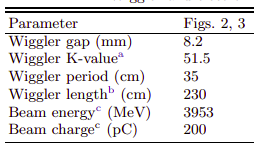

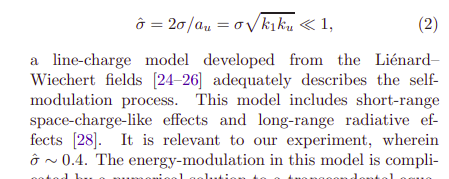

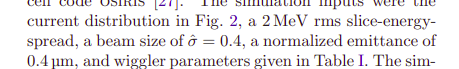

In [4]:
from IPython.display import Image, display
from IPython.display import display
display(Image("paper/bunch_parameters.png"),
        Image("paper/sigma.png"),
        Image("paper/emittance.png"))


In [5]:
# Bunch initial parameters as described in the paper
numPart = int(5e5)
fn = 'initialDistro.in'  # File to save the distribution
Q = 200e-12  # Charge

avgE = 3953  # Energy in MeV
sigE = 2  # 2 MeV energy spread for whole beam. 
c = 3e8
gamma = avgE / .511
beta = np.sqrt( 1 - 1 / np.power(gamma,2) )
print('beta = ', beta)
printf('gamma = ', gamma)

K = 51.5
lu = 35e-2  # lambda_u in m
gamma_ = gamma / np.sqrt( 1 + .5 * np.power(K,2.) )  # Reduced gamma in undulator
beta_ = np.sqrt( 1 - 1 / np.power(gamma_,2) )
print('beta_ = ', beta_)
printf('gamma_ = ', gamma_)
lr = lu / 2 / np.power(gamma_,2)  # Radiation wavelength
printf('lu = ', lu)
printf('lr = ', lr)
kr = 2*np.pi / lr
ku = 2*np.pi / lu

sigHat = .4  # Normalised transverse spread
sigr = sigHat / np.sqrt( kr * ku )
lz = 60e-15 * 3e8  # Approximate length of the bunch
printf('transverse spread = ', sigr)
printf('bunch length = ', lz)
dx = 10e-6
dy = dx
dz = .07e-6
NpC = numPart / (lz * sigr**2 * np.pi) * (dx * dy * dz)
print('NpC at beginning = ', NpC)
emitxN = .4e-6 # Transverse normalised emittance
# If we assume corr(x,px) = 0 at the start of the simulation, then emitx_normalised = sig_x * sig_px
sigpr = emitxN / sigr
print('average momentum = ', beta*gamma, '\ntransverse momentum spread = ', sigpr)

# Time that simulation should last
Lu = 6 * lu
lTrun = 9e-6
lmin = lTrun * beta / beta_ - 5 * lu * ( 1 + beta / beta_ )
lcent = lmin - lTrun / ( 1 - beta_ * beta )
print( 'lmin in lab frame = ', lmin, ', lcent in lab frame is = ', lcent)
timeDiff = beta_ / c / ( 1 - beta_ * beta ) * lTrun
print('time difference in lab frame between center and maxZ particle is ', timeDiff)
totTime =  2 * -lcent / beta / c + Lu / beta_ / c
print( 'simulation time = ', totTime )


beta =  0.9999999916447745
gamma = 7.74e+03
beta_ =  0.999988911509873
gamma_ = 2.12e+02
lu = 3.50e-01
lr = 3.88e-06
transverse spread = 7.42e-05
bunch length = 1.80e-05
NpC at beginning =  11.242925312534826
average momentum =  7735.812068437952 
transverse momentum spread =  0.005391092963984953
lmin in lab frame =  -3.500010390351366 , lcent in lab frame is =  -4.311051707879512
time difference in lab frame between center and maxZ particle is  2.7034410810150153e-09
simulation time =  3.5740422579620394e-08


In [112]:
# This cell is obsolete and no longer necessary

# # Make the shape

# x = np.linspace( 0, 60, 500)
# func = []

# # Flat part
# y = np.zeros( x.size )
# for i, yi in enumerate(y):
# #     if x[i] < 15:
# #         y[i] = linear( x[i], 5, 12, 0, 5 )
#     if x[i] > 15 and x[i] < 52:
#         y[i] = linear( x[i], 17, 50, 4, 2 )
# func.append(y)
        
# # Gaussian left
# y = gaussian( x, 16, 2, height = 16)
# func.append(y)
# y = gaussian( x, 16, 4, height = 7.5 )
# func.append(y)

# # Gaussian right
# y = quadratic( x, 52, .8, height = 7.5)
# func.append(y)
# y = gaussian( x, 52, 2.5, height = 7.5 )
# func.append(y)

# # Plot
# fig = plt.figure()
# ytot = np.zeros(x.size)
# for y in func:
#     plt.plot( x, y )
#     for i, yi in enumerate(y):
#         if yi > ytot[i]:
#             ytot[i] = yi
# plt.plot( x, ytot, linewidth = 4, linestyle = ':' )   
# fig.set_size_inches(15, 4)
# plt.xlim( left = 0 )
# plt.ylim( bottom = 0, top = 17)
# plt.grid()

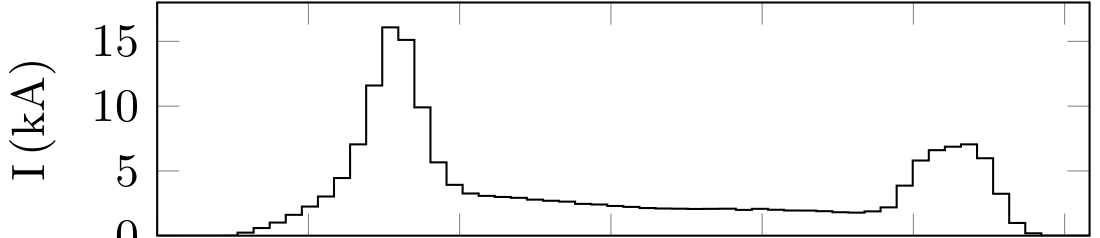

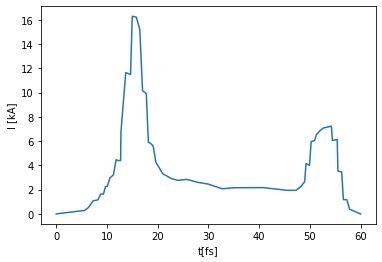

In [113]:
display(Image("paper/current_macArthur.png"))
shape = pd.read_csv('paper/inputCurrent.csv', names = ['t', 'I'])
shape = shape.sort_values( by = ['t']  )
x = np.array(shape['t'])
ytot = np.array(shape['I'])
plt.plot( x, ytot )
plt.xlabel('t[fs]')
plt.ylabel('I [kA]')
plt.show()

In [108]:
# Make the z distribution
q = Q / numPart  # Charge per particle

# Longitudinal time coordinate
f = interpolate.interp1d(x, ytot)
z = []
while len(z) < numPart:
    xr = np.random.uniform( 0.0, 60 )
    yr = np.random.uniform( 0.0, 20 )
    if yr <= f(xr):
        z.append(xr)
z = np.array(z) * 1e-15  # Unit conversion to s


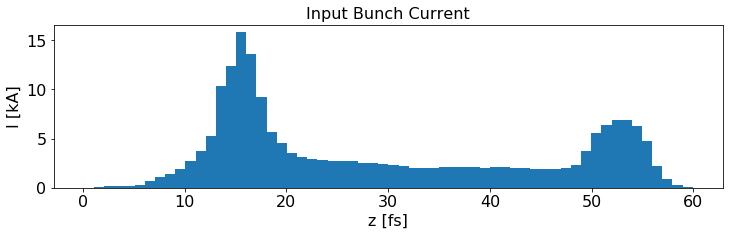

In [114]:
# Plot bunch current

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
nbins = 60
binsize = (np.max(z) - np.min(z)) / nbins
ax.hist( z*1e15, bins = nbins, weights = q * 1e-3 / binsize * np.ones(z.size) )
ax.set_xlabel('z [fs]', fontsize = fs)
ax.set_ylabel('I [kA]', fontsize = fs)
ax.set_yticks([0, 5, 10, 15])
ax.tick_params( axis = 'both', labelsize = fs )
fig.set_size_inches(12,3 )
ax.set_title('Input Bunch Current', fontsize = fs)
plt.show()



In [115]:
# Make the rest of the distribution

# Longitudinal beam size
zm = np.array( z * beta * c )  # time to position conversion
zm -= np.average(zm)

# Transerse beam size Gaussian distro
x = np.random.normal( 0, sigr, len(zm))
y = np.random.normal( 0, sigr, len(zm))

# Energy
E = np.random.normal( avgE, sigE, len(zm))  # in MeV

# Transverse momenta
px = np.random.normal( 0, sigpr, len(zm))
py = np.random.normal( 0, sigpr, len(zm))

# Longitudinal momentum
pz = []
for i in range(len(zm)):
    g = E[i] / .511
    gb2 = g**2 * ( 1 - 1 / g**2 )
    pz.append( np.sqrt( gb2 - px[i]**2 - py[i]**2 ) )

print('mean p = ', np.average(px), ', ', np.average(py), ', ', np.average(pz))

mean p =  -3.3401699609700155e-06 ,  -7.772425416137689e-06 ,  7735.816859670726


In [116]:
# Write to file

file = open( fn, mode = 'w' )
file.write( str( str(numPart) + '\n' ) )
file.close()

df = pd.DataFrame([x,px,y,py,zm,pz])
df = df.T
df.to_csv( fn, sep = '\t', header = False, index = False, mode = 'a' )

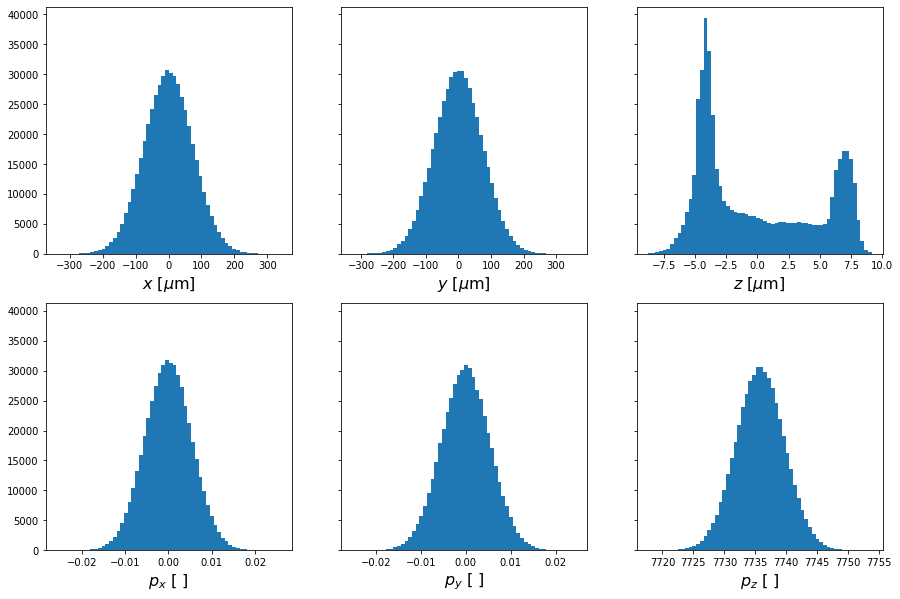

In [117]:
# Plot bunch parameters

fig, ax = plt.subplots( 2, 3, sharey = True)
fig.set_size_inches(15, 10)
ax[0,0].hist( x*1e6, bins = nbins )
ax[0,0].set_xlabel('$x$ [$\mu$m]', fontsize = fs)
ax[0,1].hist( y*1e6, bins = nbins )
ax[0,1].set_xlabel('$y$ [$\mu$m]', fontsize = fs)
ax[0,2].hist( zm*1e6, bins = nbins )
ax[0,2].set_xlabel('$z$ [$\mu$m]', fontsize = fs)
ax[1,0].hist( px, bins = nbins )
ax[1,0].set_xlabel('$p_x$ [ ]', fontsize = fs)
ax[1,1].hist( py, bins = nbins )
ax[1,1].set_xlabel('$p_y$ [ ]', fontsize = fs)
ax[1,2].hist( pz, bins = nbins )
ax[1,2].set_xlabel('$p_z$ [ ]', fontsize = fs)
plt.show()


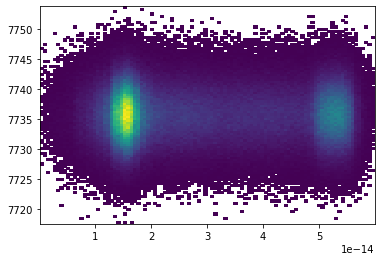

In [118]:
plt.hist2d(z, pz, bins = 100, cmin = 1)
plt.show()
